<h1>🧮 Descriptive statistical analysis 🧮</h1>
<h2>Superusers</h2>
<p>To find out how active the most active tweeters were, lets first have a look at the output per tweeter. Of course, if they changed their handle during the ten-day period of our corpus, there's no way for us to track this.</p>
<p>We'll start from the file with English tweets that we created in the first phase of this project.</p>

In [5]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
df = pd.read_csv('englishtweets.csv')

<p>First, let's see how many tweeters we are dealing with using a simple 'count' function on the column 'authorhandle'.</p>

In [80]:
total_authors = df['authorhandle'].count()
print("There are " + str(total_authors) + " tweeters in our corpus.")

There are 301726 tweeters in our corpus.


<p>We can also look at how active the most active users are. To do that, we need to group the tweets per author (based on the column 'authorhandle') and count the number of tweets for each other. Let's have a look at the top 100 for now.</p>

In [41]:
author_tweet_count = df.groupby('authorhandle')['tweet'].count()
top_100_authors = author_tweet_count.nlargest(100)

# Print out the top 100 authors and their tweet counts
print("Top 100 Tweeters:")
print(top_100_authors)


Top 100 Tweeters:
authorhandle
@MoCooray           2505
@thatmediabuzz      1567
@nika6547           1176
@Arad87709987        745
@TopBananaMall       621
@royals_forever      592
@talhamuneeb7700     559
@DaAnsahonSports     543
@lordweapon7228      515
@Alima1000           508
@valurank            501
@Brijend84228427     456
@CrosslandRobert     443
@Rokibul60100130     389
@jose_expert         378
@DavidFranks         310
@khmerxbxboi         310
@Mimi62346463        265
@LiveOnl00199784     237
@arcAruu             221
@SamiAdn00298163     214
@raycasey2003        214
@TasnimulHasanR      205
@HighwaySqueak       200
@LeicesterWorker     199
@dmn_record          189
@GlobeSLnews         183
@MihirunS            177
@BANGShowbiz         174
@FlamzespotNg        168
@SanjayDaslaniya     167
@inartfairNYK        166
@Juyelrana12         159
@RandomWebFace       159
@ReneNow             154
@RickOShea54321      148
@MrInfluencerUg1     146
@alleyeinstein       145
@Eurodude23        

<p>If we now want to look at how a small group of people contributed to a large section of the conversation, we'll need to perform a series of steps. Let's say we want to find out how many authors are behind 10% of the tweets. I tweaked the numbers in the code to get as close to 10% as possible (I'm sure there are more elegant ways to do this though!</p>
<ul>
    <li>Calculate the total number of tweets</li>
    <li>Group the tweets per author (based on the column 'authorhandle') and count the number of tweets for each other.</li>
    <li>Get the top 100 authors based on tweet count</li>
    <li>Calculate the total number of tweets made by the top 100 authors</li>
    <li>Calculate the percentage of tweets made by the top 100 authors</li>
    

In [40]:
total_tweets = df['tweet'].count()
top_authors = author_tweet_count.nlargest(237)
top_tweets = top_authors.sum()
percent_top = (top_tweets / total_tweets) * 100
authorshare = (237 / total_authors) * 100

print(f"{percent_top:.2f}% of the total tweets was written by {authorshare:.2f}% of the total tweeters.")

10.01% of the total tweets was written by 0.08% of the total tweeters.


<p>We can also calculate the average number of tweets per contributor.</p>

In [43]:
len(df['tweet'])/len(englishdata.value_counts(['authorhandle']))

1.6369505539219409

However, the 0.08% of tweeters reposonsible for 10% of tweets were obviously getting very different averages:

In [51]:
top_authors.sum() / top_authors.count()

127.48523206751055

<p>Now let's create a new dataset with just the tweets by the most active users and save this as a separate .csv and .txt file!</p>

In [74]:
df_top = df[df['authorhandle'].isin(top_authors.index)]
df_top.to_csv('englishtweetstopauthors.csv', index=False)
df_top["tweet"].to_csv(r'tweetstopauthors.txt', header=None, index=None, sep=' ', mode='a')

<p>We can also generate a word cloud from this data!</p>

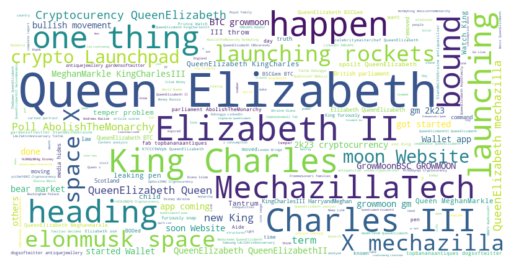

In [69]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df = pd.read_csv('englishtweetstopauthors.csv')

# Concatenate all the tweets into a single string
text = " ".join(tweet for tweet in df_top["tweet"])

# Define a list of stop words to exclude from the word cloud
stop_words = set(STOPWORDS)
stop_words.update(["amp", "https", "co", "com", "rt", "via", "will", "can", "just", "now", "t", "re"])

# Generate a word cloud image with the stop words excluded
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h2>Hashtag differences</h2>

queueforthequeen: 8081 tweets


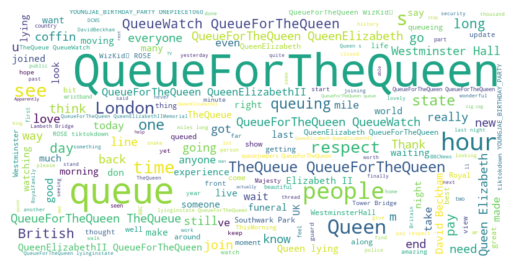

abolishthemonarchy: 29619 tweets


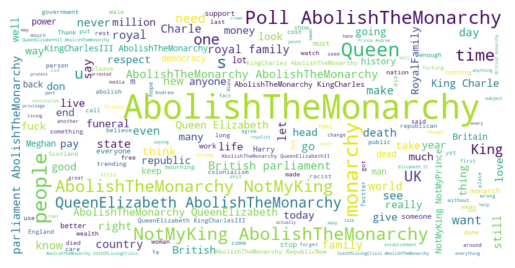

queenelizabeth: 269256 tweets


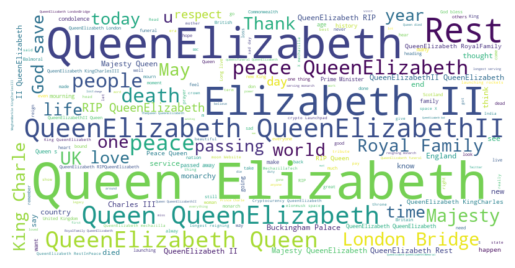

In [78]:
import pandas as pd

# Read in the original dataframe
df = pd.read_csv('englishtweets.csv')

# Define the hashtags to filter by
hashtags_list = ['queueforthequeen', 'abolishthemonarchy', 'queenelizabeth']

# Loop through the hashtags and filter the dataframe
dfs = {}
for hashtag in hashtags_list:
    # Convert the hashtag and the filter string to lowercase
    hashtag_lower = hashtag.lower()
    df_filtered = df[df['hashtags'].fillna('').str.lower().str.contains(hashtag_lower)]

    # Save the filtered dataframe to a CSV file
    df_filtered.to_csv(f"{hashtag_lower}.csv", index=False)
    df_filtered["tweet"].to_csv(f"{hashtag_lower}.txt", index=False)

    # Print the number of tweets in the filtered dataframe
    print(f"{hashtag}: {len(df_filtered)} tweets")

    # Concatenate all the tweets into a single string
    text = " ".join(tweet for tweet in df_filtered["tweet"])

    # Define a list of stop words to exclude from the word cloud
    stop_words = set(STOPWORDS)
    stop_words.update(["amp", "https", "co", "com", "rt", "via", "will", "can", "just", "now", "t", "re"])

    # Generate a word cloud image with the stop words excluded
    wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()